# Logistic Regression Modelling

In [5]:
# %pip install imbalanced-learn

In [6]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel('Threshold_Data.xlsx')
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Total_Spent,BuyingPower,HouseHoldMembers,Total_Children,TotalPurchases,Dt_CustomerConverted,SinceEnrolled,CLV,AOV,AppliedPromo
0,0,1826,1970,Graduation,Single,84835.0,0,0,2014-06-16,0,...,1190,84240.0,1,0,15,2014-06-16,3543,5775.575342,79.333333,887.8
1,1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,...,577,56802.5,1,0,18,2014-06-15,3544,2801.216438,32.055556,715.0
2,2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,...,251,67141.5,3,1,11,2014-05-13,3577,1229.900000,22.818182,587.4
3,3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,...,11,32468.5,4,2,4,2014-11-05,3401,51.247945,2.750000,503.4
4,4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,...,91,21428.5,2,1,8,2014-08-04,3494,435.553425,11.375000,521.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2235,10142,1976,PhD,Single,66476.0,0,1,2013-07-03,99,...,689,66131.5,2,1,20,2013-07-03,3891,3672.464384,34.450000,743.4
2222,2236,5263,1977,n_Cycle,Married,31056.0,1,0,2013-01-22,99,...,55,31028.5,3,1,5,2013-01-22,4053,305.363014,11.000000,514.6
2223,2237,22,1976,Graduation,Single,46310.0,1,0,2012-03-12,99,...,309,46155.5,2,1,14,2012-03-12,4369,1849.343836,22.071429,617.0
2224,2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,...,1383,65127.5,2,0,20,2012-11-29,4107,7780.795890,69.150000,1027.0


In [8]:
selected_columns = [
    'Age',
    'Marital_Status',
    'Education',
    'Income', 
    'Kidhome', 
    'Teenhome',
    'Recency',
    # 'Dt_Customer',
    'MntFishProducts', 
    'MntMeatProducts', 
    # 'MntFruits', 
    # 'MntSweetProducts', 
    'MntWines', 
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    # 'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Total_Children',
    'HouseHoldMembers',
    # 'Total_Spent',
    # 'BuyingPower',
    # 'TotalPurchases',
    'SinceEnrolled',
    # 'Dt_CustomerConverted',
    'Response',
    # 'Interest',
    'AOV',
    'CLV',
    # 'Complain'
]
df = df[selected_columns]

KeyError: "['Interest'] not in index"

In [ ]:
# One Hot Encode Marital Status and Education
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
    # data = data.join(encoded)
    return data
df = one_hot_encode(df, 'Marital_Status')
df = one_hot_encode(df, 'Education')

,Age,Income,Kidhome,Teenhome,Recency,MntFishProducts,MntMeatProducts,MntWines,MntGoldProds,NumDealsPurchases,...,Response,Interest,AOV,CLV,Single,Together,Graduation,Master,PhD,n_Cycle
0,54,84835.0,0,0,0,111,379,189,218,1,...,1,1,79.333333,5772.315068,True,False,True,False,False,False
1,63,57091.0,0,0,0,7,64,464,37,1,...,1,5,32.055556,2799.635616,True,False,True,False,False,False
2,66,67267.0,0,1,0,15,59,134,30,1,...,0,2,22.818182,1229.212329,False,False,True,False,False,False
3,57,32474.0,1,1,0,0,1,10,0,1,...,0,7,2.750000,51.217808,False,True,True,False,False,False
4,35,21474.0,1,0,0,11,24,6,34,2,...,1,7,11.375000,435.304110,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,48,66476.0,0,1,99,47,126,372,78,2,...,0,103,34.450000,3670.576712,True,False,False,False,True,False
2210,47,31056.0,1,0,99,3,13,5,16,1,...,0,107,11.000000,305.212329,False,False,False,False,False,True
2211,48,46310.0,1,0,99,15,88,185,14,2,...,0,107,22.071429,1848.497260,True,False,True,False,False,False
2212,46,65819.0,0,0,99,149,701,267,63,1,...,0,102,69.150000,7777.006849,False,False,True,False,False,False


## Split the dataset

In [ ]:
X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


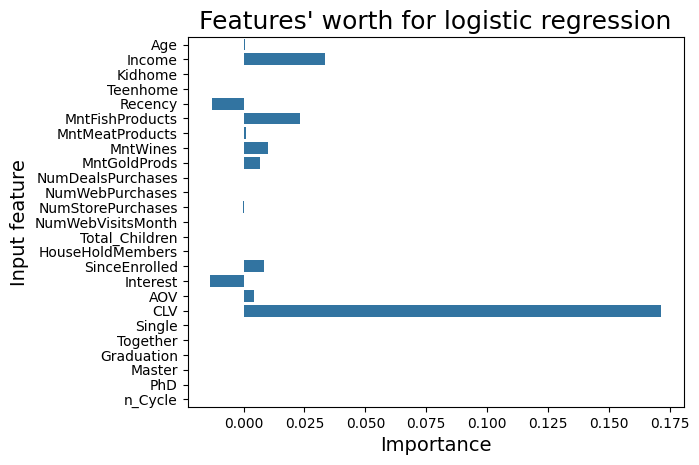

CLV: 0.17137844611528832
Income: 0.03353383458646621
MntFishProducts: 0.02320802005012536
MntWines: 0.010175438596491275
SinceEnrolled: 0.008320802005012585
MntGoldProds: 0.006867167919799555
AOV: 0.004260651629072731
MntMeatProducts: 0.0008521303258145818
Age: 0.0007518796992481776
NumWebPurchases: 0.0
Kidhome: 0.0
Teenhome: 0.0
NumDealsPurchases: 0.0
n_Cycle: 0.0
PhD: 0.0
Total_Children: 0.0
HouseHoldMembers: 0.0
Single: 0.0
Together: 0.0
Graduation: 0.0
Master: 0.0
NumWebVisitsMonth: 0.0
NumStorePurchases: -0.00010025062656639679
Recency: -0.012932330827067606
Interest: -0.013734335839598943


In [ ]:
# Create a ColumnTransformer for scaling
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


# Define a ColumnTransformer for scaling
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), X.columns)
#     ])

# Use a pipeline to include the preprocessing step and the logistic regression model
pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the pipeline
pipeline.fit(X_train_resampled, y_train_resampled)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for logistic regression", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

In [ ]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)

clf = LogisticRegression(random_state=0)

In [ ]:
# # Hyperparameter checking

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2']
}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score, zero_division=1),
    'f1': make_scorer(f1_score, zero_division=1),
    'auc': make_scorer(roc_auc_score, needs_proba=True)
}

grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=5, refit='f1')

# # Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

from sklearn.model_selection import StratifiedKFold

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)
# dahil mataas yung C value wala masyadong regularization na nagaganap therefore di nagooverfit yung model

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


In [ ]:
clf = LogisticRegression(random_state=0, C=best_params['C'], penalty=best_params['penalty'])
clf.fit(X_train_resampled, y_train_resampled)
train_preds = clf.predict(X_train_resampled)
preds = clf.predict(scaler.transform(X_test))

## Train Scores

In [ ]:
acc = accuracy_score(y_train_resampled, train_preds)
prec = precision_score(y_train_resampled, train_preds)
rec = recall_score(y_train_resampled, train_preds)
f1 = f1_score(y_train_resampled, train_preds)
auc = roc_auc_score(y_train_resampled, train_preds)

In [ ]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.7536
Precision: 0.7500
Recall: 0.7608
F1: 0.7554
AUC: 0.7536


## Test Scores

In [ ]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [ ]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8075
Precision: 0.4264
Recall: 0.8485
F1: 0.5676
AUC: 0.8244


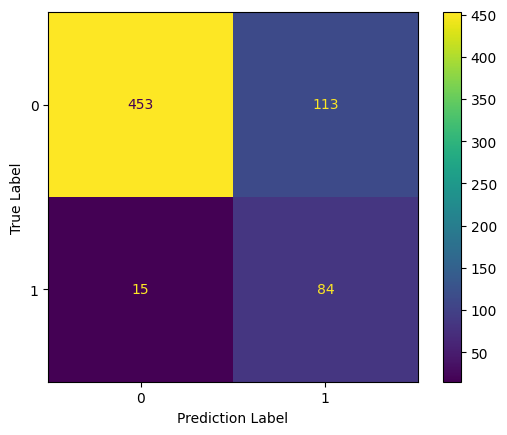

In [ ]:
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
# plt.title('Did the customer say yes?')
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()